In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')
#this is a simulation of user choice 


#rows=customers
#columns=ads which a corresponding user would click if they appear on the screen
# example:the user in row 1 would click on the ad only if ad 9 appears on the screen.
#         the user in row 3 would click on the ad only if ad 2 or ad 8 appears on the screen

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
#RANDOM SELECTION ALGORITHM

import random
N=10000
d=10
ads_selected=[]
total_reward=0
for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=df.values[n,ad]
    total_reward=total_reward+reward
    

In [5]:
total_reward

1256

Text(0, 0.5, 'number of times the ad is selected')

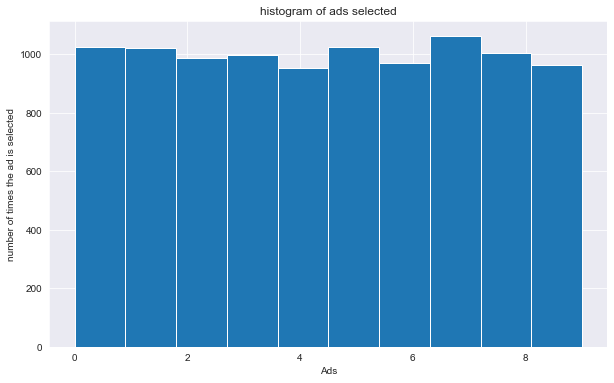

In [6]:
#visulaizing the result for random selection


plt.figure(figsize=(10,6))
plt.hist(ads_selected)
plt.title('histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('number of times the ad is selected')

In [21]:
#THOMPSON SAMPLING ALGORITHM

ads_selected=[]
N=10000
d=10
numbers_of_rewards_1=[0]*d
numbers_of_rewards_0=[0]*d

import random
total_reward=0

for n in range(0,N):
    max_random=0
    ad=0
    for i in range(0,d):
        random_beta=random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
        if random_beta>max_random:
            max_random=random_beta
            ad=i
        
    ads_selected.append(ad)
    reward=df.iloc[n,ad]
    if reward==1:
        numbers_of_rewards_1[ad]+=1
    else:
        numbers_of_rewards_0[ad]+=1
        
    total_reward=total_reward+reward

In [22]:
total_reward

2616

In [23]:
ads_selected[9000:]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


Text(0, 0.5, 'number of times the ad is selected')

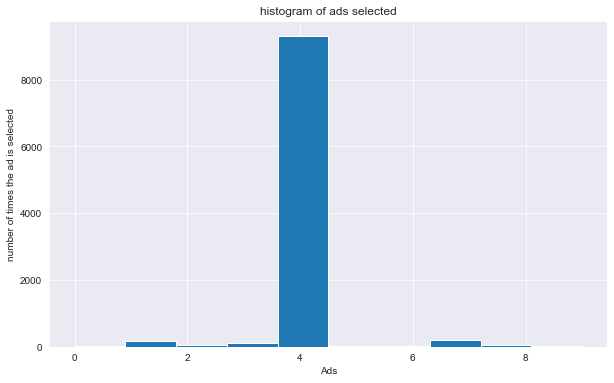

In [24]:
#visulaizing the result for thompson sampling


plt.figure(figsize=(10,6))
plt.hist(ads_selected)
plt.title('histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('number of times the ad is selected')